In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x, y, z = sympy.symbols("x y z")
h1, h2, h3 = sympy.symbols("h1 h2 h3", positive=True)

In [3]:
phix = sympy.Piecewise((1/h1*(x+h1), (-h1 <= x) & (x <= 0)),
                       (1/h1*(h1-x), (0 <= x) & (x <= h1)),
                       (0, True))

phiy = sympy.Piecewise((1/h2*(y+h2), (-h2 <= y) & (y <= 0)),
                       (1/h2*(h2-y), (0 <= y) & (y <= h2)), 
                       (0, True))


phiz = sympy.Piecewise((1/h3*(z+h3), (-h3 <= z) & (z <= 0)),
                       (1/h3*(h3-z), (0 <= z) & (z <= h3)), 
                       (0, True))

In [8]:
A = phiy
B = phix
C = phiz


for i in range(-1, 2):
    for j in range(-1, 2):
        for k in range(-1, 2):

            a = phiy.subs(y, y-i*h2)
            b = phix.subs(x, x-j*h1)
            c = phiz.subs(z, z-k*h3)
            

            integrant_y = sympy.diff(a, y)*sympy.diff(A, y)
            integrant_x = sympy.diff(b, x)*sympy.diff(B, x)
            integrant_z = sympy.diff(c, z)*sympy.diff(C, z)
            

            integrant_Y = a * A
            integrant_X = b * B
            integrant_Z = c * C
            



            xx = sympy.integrate(integrant_x, (x, -h1, h1))
            yy = sympy.integrate(integrant_y, (y, -h2, h2))
            zz = sympy.integrate(integrant_z, (z, -h3, h3))
            


            XX = sympy.integrate(integrant_X, (x, -h1, h1))
            YY = sympy.integrate(integrant_Y, (y, -h2, h2))
            ZZ = sympy.integrate(integrant_Z, (z, -h3, h3))
            

        
        
            print(f"{i}_{j}_{k}: {yy*XX*ZZ+xx*YY*ZZ+zz*XX*YY}")
        

-1_-1_-1: -h1*h2/(36*h3) - h1*h3/(36*h2) - h2*h3/(36*h1)
-1_-1_0: h1*h2/(18*h3) - h1*h3/(9*h2) - h2*h3/(9*h1)
-1_-1_1: -h1*h2/(36*h3) - h1*h3/(36*h2) - h2*h3/(36*h1)
-1_0_-1: -h1*h2/(9*h3) - h1*h3/(9*h2) + h2*h3/(18*h1)
-1_0_0: 2*h1*h2/(9*h3) - 4*h1*h3/(9*h2) + 2*h2*h3/(9*h1)
-1_0_1: -h1*h2/(9*h3) - h1*h3/(9*h2) + h2*h3/(18*h1)
-1_1_-1: -h1*h2/(36*h3) - h1*h3/(36*h2) - h2*h3/(36*h1)
-1_1_0: h1*h2/(18*h3) - h1*h3/(9*h2) - h2*h3/(9*h1)
-1_1_1: -h1*h2/(36*h3) - h1*h3/(36*h2) - h2*h3/(36*h1)
0_-1_-1: -h1*h2/(9*h3) + h1*h3/(18*h2) - h2*h3/(9*h1)
0_-1_0: 2*h1*h2/(9*h3) + 2*h1*h3/(9*h2) - 4*h2*h3/(9*h1)
0_-1_1: -h1*h2/(9*h3) + h1*h3/(18*h2) - h2*h3/(9*h1)
0_0_-1: -4*h1*h2/(9*h3) + 2*h1*h3/(9*h2) + 2*h2*h3/(9*h1)
0_0_0: 8*h1*h2/(9*h3) + 8*h1*h3/(9*h2) + 8*h2*h3/(9*h1)
0_0_1: -4*h1*h2/(9*h3) + 2*h1*h3/(9*h2) + 2*h2*h3/(9*h1)
0_1_-1: -h1*h2/(9*h3) + h1*h3/(18*h2) - h2*h3/(9*h1)
0_1_0: 2*h1*h2/(9*h3) + 2*h1*h3/(9*h2) - 4*h2*h3/(9*h1)
0_1_1: -h1*h2/(9*h3) + h1*h3/(18*h2) - h2*h3/(9*h1)
1_-1_-1: -h

In [7]:
sympy.integrate(phix, (x, -h1, h1))*sympy.integrate(phiy, (y, -h2, h2))*sympy.integrate(phiz, (z, -h3, h3))

h1*h2*h3

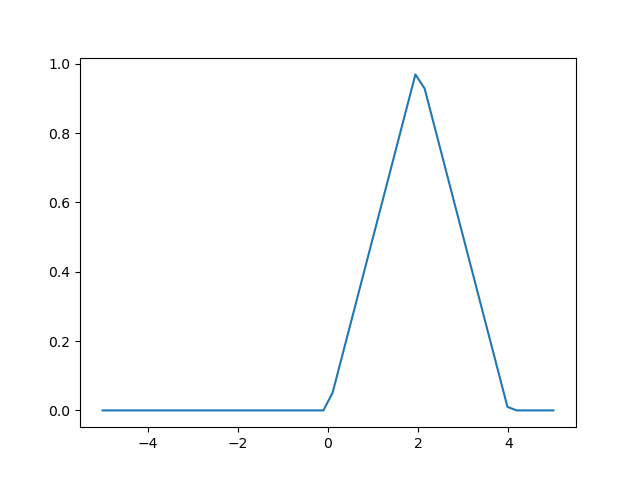

In [65]:
t = np.linspace(-5, 5)
yt = sympy.lambdify((h1, x), phix.subs(x, x-2))(2, t)

fig, ax = plt.subplots()
ax.plot(t, yt)
plt.show()

In [6]:
integrant_y.simplify()

Piecewise((h2**(-2), Eq(y, 0)), (0, (y >= -1) & (y <= 0)), (-1/h2**2, (y >= 0) & (y <= 1)), (h2**(-2), Eq(y, 1)), (0, True))

In [7]:
basis = (phix*phiy).expand().simplify()

In [8]:
f = sympy.lambdify((h1, h2, x, y), basis)

In [15]:
tx, ty = np.linspace(-2, 2), np.linspace(-2, 2)

In [16]:
mx, my = np.meshgrid(tx, ty, indexing="ij")

In [19]:
mz = sympy.lambdify((h1, h2, x, y), basis)(2, 2, mx, my)

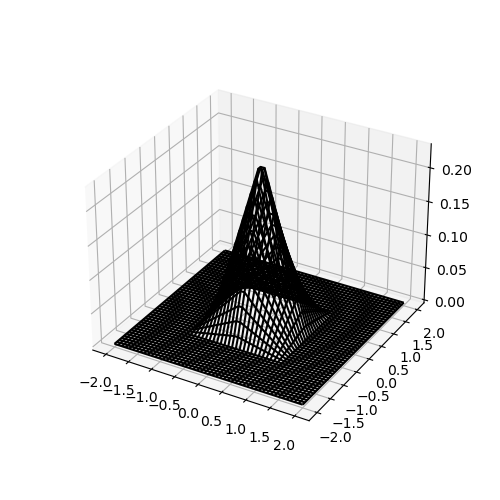

In [20]:
%matplotlib widget
fig = plt.figure(figsize=(5, 5))
ax = plt.axes(projection='3d')
ax.plot_wireframe(mx, my, mz, color="black")
# ax.plot_wireframe(xx, yy, z_simpson, color="red")
# ax.set_box_aspect((np.ptp(xx), np.ptp(yy), np.ptp(z_simpson)))
plt.show()